<center><h2>Creacion y Entrenamiento del Modelo</h2></center>
En este proyecto se utiliza un modelo de regresión logística para predecir el riesgo de burnout en personas a partir de hábitos digitales y de salud como el sueño, uso de pantallas, nivel de estrés, entre otros.

### Importacion de librerias

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


### Creacion de DataFrame a usar
 - Se carga el archivo CSV limpio que contiene los datos de 500 personas con variables relevantes para el análisis.

In [5]:
df = pd.read_csv('../habitos_salud_mental_limpio.csv')
df.head()

,id,edad,sexo,horas_pantalla,usa_redes_sociales,duerme_horas,actividad_fisica,nivel_estres,medita,horas_redes,nivel_ansiedad,riesgo_burnout
0,1,56,Masculino,5.3,True,5.4,Baja,1,False,0.9,1,0
1,2,46,Femenino,8.3,True,5.3,Baja,1,True,2.9,2,0
2,3,32,Masculino,3.8,True,6.8,Alta,6,True,3.8,3,0
3,4,60,Otro,7.2,True,8.2,Media,5,True,1.9,3,0
4,5,25,Femenino,7.2,True,5.0,Media,9,False,3.3,10,1


### Codificación de variables categóricas

Algunas columnas del dataset contienen valores categóricos (texto), por ejemplo: "Masculino", "Femenino", "Alta", "Baja", etc.  
Como los modelos de Machine Learning trabajan con valores numéricos, es necesario transformar estas categorías en números.

- `sexo`: se codifica como 0 = Masculino, 1 = Femenino, 2 = Otro  
- `actividad_fisica`: se codifica como 0 = Baja, 1 = Media, 2 = Alta  
- `usa_redes_sociales` y `medita`: son booleanos (`True`/`False`) y se transforman en 1 y 0 respectivamente


In [6]:
df["sexo"] = df["sexo"].map({"Masculino": 0, "Femenino": 1, "Otro": 2})
df["actividad_fisica"] = df["actividad_fisica"].map({"Baja": 0, "Media": 1, "Alta": 2})
df["usa_redes_sociales"] = df["usa_redes_sociales"].astype(int)
df["medita"] = df["medita"].astype(int)


### Selección de variables 

Seleccionamos las variables que usaremos para entrenar el modelo:

- **Variables predictoras (`x`)**: características como edad, sexo, horas de pantalla, nivel de estrés, entre otras.
- **Variable objetivo (`y`)**: la etiqueta que queremos predecir, que es el riesgo de burnout (0 = no, 1 = sí).


In [7]:

x = df[["edad", "sexo", "horas_pantalla", "usa_redes_sociales", "horas_redes","duerme_horas", "actividad_fisica", "nivel_estres", "nivel_ansiedad", "medita"]]
y = df["riesgo_burnout"]


### División en entrenamiento y prueba

- **80% para entrenamiento** (`x_train`, `y_train`): se usa para entrenar el modelo.
- **20% para prueba** (`x_test`, `y_test`): se usa para evaluar el rendimiento del modelo con datos que no ha visto.

Se utiliza `stratify= y ` para mantener la misma proporción de clases (0 y 1) en ambos conjuntos.  



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## Creación del Modelo



In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)

#### Entrenamiento del modelo
- Se entrena el modelo de regresión logística con todos los datos (`X` e `y`).

In [10]:
model.fit(x,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


### Predicción sobre el conjunto de prueba
Se realizan predicciones sobre los datos de prueba (`x_test`).
- `y_predict` contiene las predicciones: 0 (sin riesgo de burnout) o 1 (con riesgo de burnout).

In [11]:
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

### Imprimir metricas
Se evalúa el rendimiento del modelo utilizando las siguientes métricas:

- **Precisión (`accuracy`)**: muestra el porcentaje de predicciones correctas sobre el total.
- **Reporte de clasificación (`classification_report`)**: incluye métricas más detalladas como:
  - **Precisión (precision)**: qué porcentaje de las predicciones positivas fueron correctas.
  - **Exhaustividad (recall)**: qué porcentaje de los casos reales positivos fueron detectados.
  - **F1-score**: combinación entre precisión y recall.
  - **Support**: cantidad real de muestras que pertenecen a cada clase (0 y 1) en el conjunto de prueba.

In [12]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Precisión: {accuracy_score(y_test, y_predict) * 100:.2f}%")
print(classification_report(y_test, y_predict))

Precisión: 99.00%
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        92
           1       0.89      1.00      0.94         8

    accuracy                           0.99       100
   macro avg       0.94      0.99      0.97       100
weighted avg       0.99      0.99      0.99       100



#### Interpretación de los coeficientes del modelo

El modelo de regresión logística asigna un coeficiente a cada variable predictora. Estos coeficientes indican cómo influye cada variable en la probabilidad de que una persona tenga riesgo de burnout:

- **Coeficiente positivo**: la variable aumenta la probabilidad de burnout.
- **Coeficiente negativo**: la variable reduce la probabilidad de burnout.
- **Valor absoluto mayor**: más influencia tiene esa variable.


In [13]:
coef = pd.Series(model.coef_[0], index=x.columns)
print(coef.sort_values(ascending=False))


horas_pantalla        1.589423
nivel_estres          1.365632
nivel_ansiedad        1.083361
medita                0.353840
horas_redes           0.206017
usa_redes_sociales    0.159553
edad                 -0.029603
sexo                 -0.416709
actividad_fisica     -1.398525
duerme_horas         -1.697692
dtype: float64


# Predicción de Riesgo de Burnout
### Vamos a usar un modelo de  entrenado para predecir si una persona tiene riesgo de burnout, según sus hábitos (pantalla, sueño, estrés, redes sociales, etc.)



## Ejemplo de Prediccion:
### Probamos el modelo con dos personas diferentes y vemos el resultado.
#### Persona 1
- Usa muchas pantallas 
- Duerme poco 
- Tiene estrés y ansiedad altos
- No hace ejercicio ni medita

#### Persona 2
- Tiene hábitos más sanos
- Duerme bien, hace ejercicio, medita
- Estrés y ansiedad bajos

In [14]:
Personas = pd.DataFrame([
    {
        "edad": 23,
        "sexo": 1, 
        "horas_pantalla": 9.5,
        "usa_redes_sociales": 1,
        "horas_redes": 3.0,
        "duerme_horas": 5.0,
        "actividad_fisica": 0, 
        "nivel_estres": 8,
        "nivel_ansiedad": 9,
        "medita": 0
    },
    {
        "edad": 30,
        "sexo": 0,
        "horas_pantalla": 5.0,
        "usa_redes_sociales": 1,
        "horas_redes": 1.0,
        "duerme_horas": 7.5,
        "actividad_fisica": 2, 
        "nivel_estres": 3,
        "nivel_ansiedad": 4,
        "medita": 1
    }
])


#### Resultados
- `predicciones`: Predecimos si tienen burnout (0 = No, 1 = Sí).
- `probabilidades`: Probabilidad que el modelo les asigna.


In [15]:
predicciones = model.predict(Personas)
probabilidades = model.predict_proba(Personas)

for i in range(len(Personas)):
    print(f"Persona {i+1}")
    print(f"Riesgo de burnout: {'Sí' if predicciones[i]==1 else 'No'}")
    print(f"Probabilidad: {round(probabilidades[i][1]*100, 1)}%")
    print("--")


Persona 1
Riesgo de burnout: Sí
Probabilidad: 98.9%
--
Persona 2
Riesgo de burnout: No
Probabilidad: 0.0%
--


### Gráfico de los datos de entrenamiento y las predicciones realizadas por el modelo.

In [16]:
from sklearn.decomposition import PCA
X_test = x_test.values if hasattr(x_test, 'values') else x_test
Y_test = y_test.values if hasattr(y_test, 'values') else y_test


In [17]:

pca = PCA(n_components=2)
x_test_2d = pca.fit_transform(X_test)


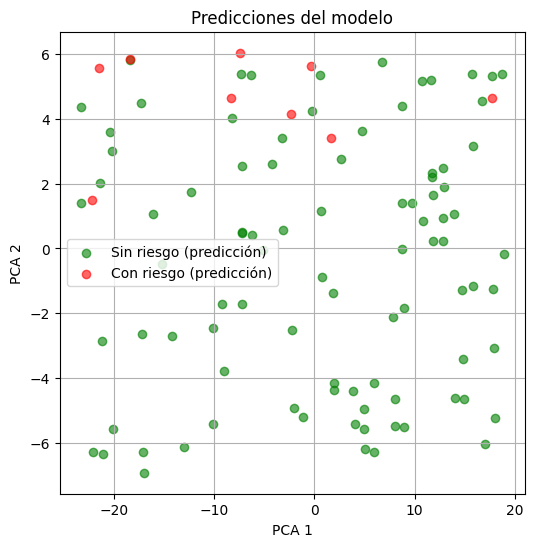

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(x_test_2d[y_predict == 0][:, 0], x_test_2d[y_predict == 0][:, 1], color='green', label="Sin riesgo (predicción)", marker='o', alpha=0.6)
plt.scatter(x_test_2d[y_predict == 1][:, 0], x_test_2d[y_predict == 1][:, 1], color='red', label="Con riesgo (predicción)", marker='o', alpha=0.6)
plt.title("Predicciones del modelo")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()


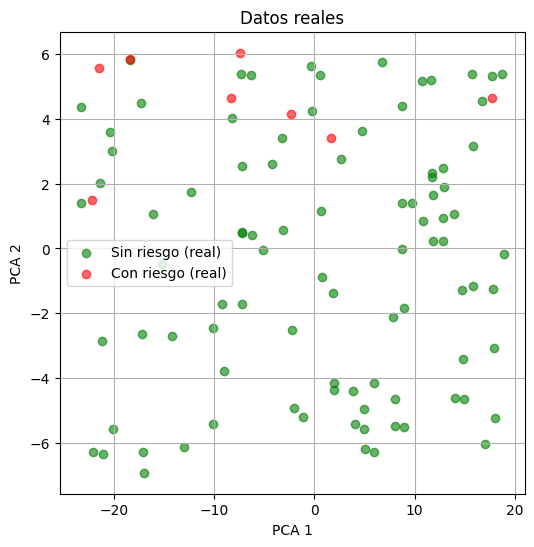

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(x_test_2d[Y_test == 0][:, 0], x_test_2d[Y_test == 0][:, 1], color='green', label="Sin riesgo (real)", alpha=0.6)
plt.scatter(x_test_2d[Y_test == 1][:, 0], x_test_2d[Y_test == 1][:, 1], color='red', label="Con riesgo (real)", alpha=0.6)
plt.title("Datos reales")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()


### Guardar el modelo entrenado en un archivo `.pkl`

In [20]:
import joblib
joblib.dump(model, "analisis_burnout.pkl")

['analisis_burnout.pkl']

In [21]:
burnout_analisis = joblib.load("analisis_burnout.pkl")
burnout_analisis.predict(Personas)

array([1, 0])